# Simulation 

In [68]:
import os
import sys
sys.path.append('..')
from sfp_nsdsyn import simulation as sim
from sfp_nsdsyn import two_dimensional_model as model
from sfp_nsdsyn import utils as utils
from sfp_nsdsyn.visualization import plot_2D_model_results as vis2D
from sfp_nsdsyn.cross_validation_2d_model import plot_model_comparison_params
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
subj_list = ['subj01','subj02','subj03','subj04','subj05','subj06','subj07','subj08']
params = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_2D/nsdsyn/summary/precision_weighted_params.csv')
params = params.query('vroinames == "V1"')
params_dict = params.to_dict(orient='records')[0]



In [5]:
scaled_sim = sim.SynthesizeData(roi='V1', n_voxels=100, precision_weight=False,
                       grating_type='scaled', sample_subj_list=subj_list)
stim_info = scaled_sim.get_stim_info_for_n_voxels()
scaled_syn_data = scaled_sim.add_pRF_info(stim_info)
scaled_syn_data = scaled_sim.add_sigma_v(scaled_syn_data)
scaled_syn_data =scaled_sim.synthesize_BOLD_2d(scaled_syn_data, 
                                               params=params_dict, 
                                               model=7)

scaled_sim.add_noise(scaled_syn_data, beta_col='normed_betas', noise_sd=0)
                                                

,w_r,w_a,class_idx,names,freq_lvl,voxel,angle,eccentricity,local_sf,local_ori,noise_SD,sigma_v_squared,betas,normed_betas,normed_betas_noisy
0,0.0,-6.0,0,pinwheel,0,0,4.604849,0.992703,0.961949,3.034053,0.03995,1.0,0.782789,0.179157,0.179157
1,0.0,-11.0,1,pinwheel,1,0,4.604849,0.992703,1.763574,3.034053,0.03995,1.0,0.975406,0.223241,0.223241
2,0.0,-20.0,2,pinwheel,2,0,4.604849,0.992703,3.206497,3.034053,0.03995,1.0,1.037915,0.237547,0.237547
3,0.0,-37.0,3,pinwheel,3,0,4.604849,0.992703,5.932020,3.034053,0.03995,1.0,0.942306,0.215666,0.215666
4,0.0,-69.0,4,pinwheel,4,0,4.604849,0.992703,11.062416,3.034053,0.03995,1.0,0.723710,0.165636,0.165636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,91.0,91.0,23,reverse spiral,5,99,3.587281,2.927979,6.995335,1.231087,0.03995,1.0,0.604110,0.135409,0.135409
2796,14.0,-34.0,24,mixtures,3,99,3.587281,2.927979,1.998667,2.407092,0.03995,1.0,1.010591,0.226520,0.226520
2797,34.0,-14.0,25,mixtures,3,99,3.587281,2.927979,1.998667,0.055081,0.03995,1.0,1.026228,0.230025,0.230025
2798,34.0,14.0,26,mixtures,3,99,3.587281,2.927979,1.998667,0.836296,0.03995,1.0,1.005449,0.225367,0.225367


In [ ]:
syn = sim.SynthesizeData(roi='V1', n_voxels=1000, 
                                precision_weight=True,
                                sample_subj_list=subj_list)
syn.syn_df.head()

,w_r,w_a,class_idx,names,freq_lvl,voxel,angle,eccentricity,noise_SD,sigma_v_squared
0,0.0,-6.0,0,pinwheel,0,0,4.604849,0.992703,0.669783,0.524578
1,0.0,-11.0,1,pinwheel,1,0,4.604849,0.992703,0.669783,0.524578
2,0.0,-20.0,2,pinwheel,2,0,4.604849,0.992703,0.669783,0.524578
3,0.0,-37.0,3,pinwheel,3,0,4.604849,0.992703,0.669783,0.524578
4,0.0,-69.0,4,pinwheel,4,0,4.604849,0.992703,0.669783,0.524578


In [22]:
scaled_sim_data = syn.synthesize_BOLD_2d(params_dict, 
                                    grating_type='scaled', 
                                    model=7)
scaled_sim_data['noisy_normed_betas'] = syn.add_noise(scaled_sim_data, 
                                                      beta_col='normed_betas',
                                                        noise_sd=0.3)
scaled_sim_data.head()

,w_r,w_a,class_idx,names,freq_lvl,voxel,angle,eccentricity,noise_SD,sigma_v_squared,local_sf,local_ori,betas,normed_betas,noisy_normed_betas
0,0.0,-6.0,0,pinwheel,0,0,4.604849,0.992703,0.669783,0.524578,0.961949,3.034053,0.782789,0.179157,0.328171
1,0.0,-11.0,1,pinwheel,1,0,4.604849,0.992703,0.669783,0.524578,1.763574,3.034053,0.975406,0.223241,0.181762
2,0.0,-20.0,2,pinwheel,2,0,4.604849,0.992703,0.669783,0.524578,3.206497,3.034053,1.037915,0.237547,0.431854
3,0.0,-37.0,3,pinwheel,3,0,4.604849,0.992703,0.669783,0.524578,5.932020,3.034053,0.942306,0.215666,0.672575
4,0.0,-69.0,4,pinwheel,4,0,4.604849,0.992703,0.669783,0.524578,11.062416,3.034053,0.723710,0.165636,0.095390


In [ ]:
constant_sim_data = syn.synthesize_BOLD_2d(params_dict, 
                                      grating_type='constant', 
                                      model=7)
constant_sim_data.head()

,w_r,w_a,class_idx,names,freq_lvl,voxel,angle,eccentricity,noise_SD,sigma_v_squared,local_sf,local_ori,betas,normed_betas
0,0.0,-6.0,0,pinwheel,0,0,4.604849,0.992703,0.03995,1.0,0.954930,1.570796,0.603787,0.138099
1,0.0,-11.0,1,pinwheel,1,0,4.604849,0.992703,0.03995,1.0,1.750704,1.570796,0.804737,0.184060
2,0.0,-20.0,2,pinwheel,2,0,4.604849,0.992703,0.03995,1.0,3.183099,1.570796,0.915081,0.209298
3,0.0,-37.0,3,pinwheel,3,0,4.604849,0.992703,0.03995,1.0,5.888733,1.570796,0.889520,0.203452
4,0.0,-69.0,4,pinwheel,4,0,4.604849,0.992703,0.03995,1.0,10.981691,1.570796,0.732117,0.167451


In [24]:
my_dataset = model.SpatialFrequencyDataset(scaled_sim_data, beta_col='noisy_normed_betas')
my_model = model.SpatialFrequencyModel(random_state=42)

loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=None,
                                                      learning_rate=0.0005, max_epoch=10000,
                                                      print_every=1000, loss_all_voxels=False)

**epoch no.0 loss: 0.0483329256
**epoch no.999 loss: 0.0301352332
**epoch no.1999 loss: 0.027071166
**epoch no.2999 loss: 0.0266086903
**epoch no.3999 loss: 0.0264506794
**epoch no.4999 loss: 0.0263848863
**epoch no.5999 loss: 0.0263592725
**epoch no.6999 loss: 0.0263510897
**epoch no.7999 loss: 0.0263493408
**epoch no.8999 loss: 0.0263491652
**epoch no.9999 loss: 0.0263491606
*epoch no.10000: Finished! final model params...
 {'sigma': 2.08, 'slope': 0.17, 'intercept': 0.18, 'p_1': 0.04, 'p_2': 0.06, 'p_3': 0.03, 'p_4': -0.16, 'A_1': 0.06, 'A_2': -0.03}
Elapsed time: 123.33 sec


In [27]:
# Extract the final epoch parameters from model_history
final_epoch_params = model_history.query('epoch == 9999')
final_epoch_params.drop(columns=['epoch'], inplace=True)
# Extract the parameters from params_dict
params_df = params.query('vroinames == "V1"')
params['type'] = 'ground truth'
final_epoch_params['type'] = 'Simulation'
merged_df = pd.concat([final_epoch_params, params], axis=0)

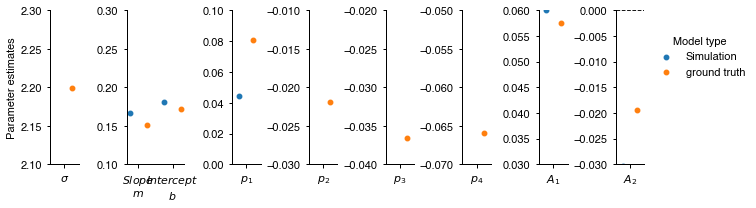

In [28]:
fig, axes = plt.subplots(1,8, figsize=(10,3), 
                         gridspec_kw={'width_ratios': [1,2,1,1,1,1,1,1]})

plot_model_comparison_params(merged_df, fig=fig, axes=axes,
                            params_list = [['sigma'], ['slope', 'intercept'], ['p_1'], ['p_2'], ['p_3'],['p_4'],['A_1'],['A_2']],
                            hue='type',
                            ylim=([2.1, 2.3], 
                                  [0.1, 0.3], 
                                  [0, 0.1],
                                  [-0.03, -0.01], 
                                  [-0.04, -0.02], 
                                  [-0.07, -0.05],
                                  [0.03, 0.06], 
                                  [-0.03, 0]) )



In [76]:
# simulation results 
n_voxels = 2500
lr = 0.0005
max_epoch = 30000
noise_levels = [0,1,2]
grating_types = ['scaled', 'constant']

pt_file_list = []
for grating, noise_lvl in itertools.product(grating_types, noise_levels):
    file_name = f'model-params_roi-V1_grating-{grating}_nvox-{n_voxels}_noise-{noise_lvl}_lr-{lr}_eph-{max_epoch}.pt'
    pt_file_list.append(f'/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/simulation/' + file_name)
model_df = model.load_all_models(pt_file_list, *['grating', 'noise'])



In [77]:
original_params = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_2D/nsdsyn/summary/precision_weighted_params.csv')
original_params = original_params.query('vroinames == "V1"')
original_params['grating'] = 'ground truth'
original_params['noise'] = 'ground truth'





In [81]:
noise_lvl = str(1)
tmp = model_df.query('noise == @noise_lvl')
original_params['grating'] = 'ground truth'
original_params['noise'] = 'ground truth'
tmp = pd.concat([tmp, original_params], axis=0)


In [79]:
tmp

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,grating,noise,Unnamed: 0,vroinames
0,2.199299,0.150471,0.171367,0.080991,-0.021898,-0.036557,-0.065930,0.057589,-0.019375,scaled,0,NaN,NaN
0,2.199294,0.150476,0.171373,0.080996,-0.021896,-0.036552,-0.065925,0.057584,-0.019377,constant,0,NaN,NaN
0,2.199299,0.150471,0.171367,0.080991,-0.021897,-0.036557,-0.065930,0.057589,-0.019375,ground truth,ground truth,0.0,V1


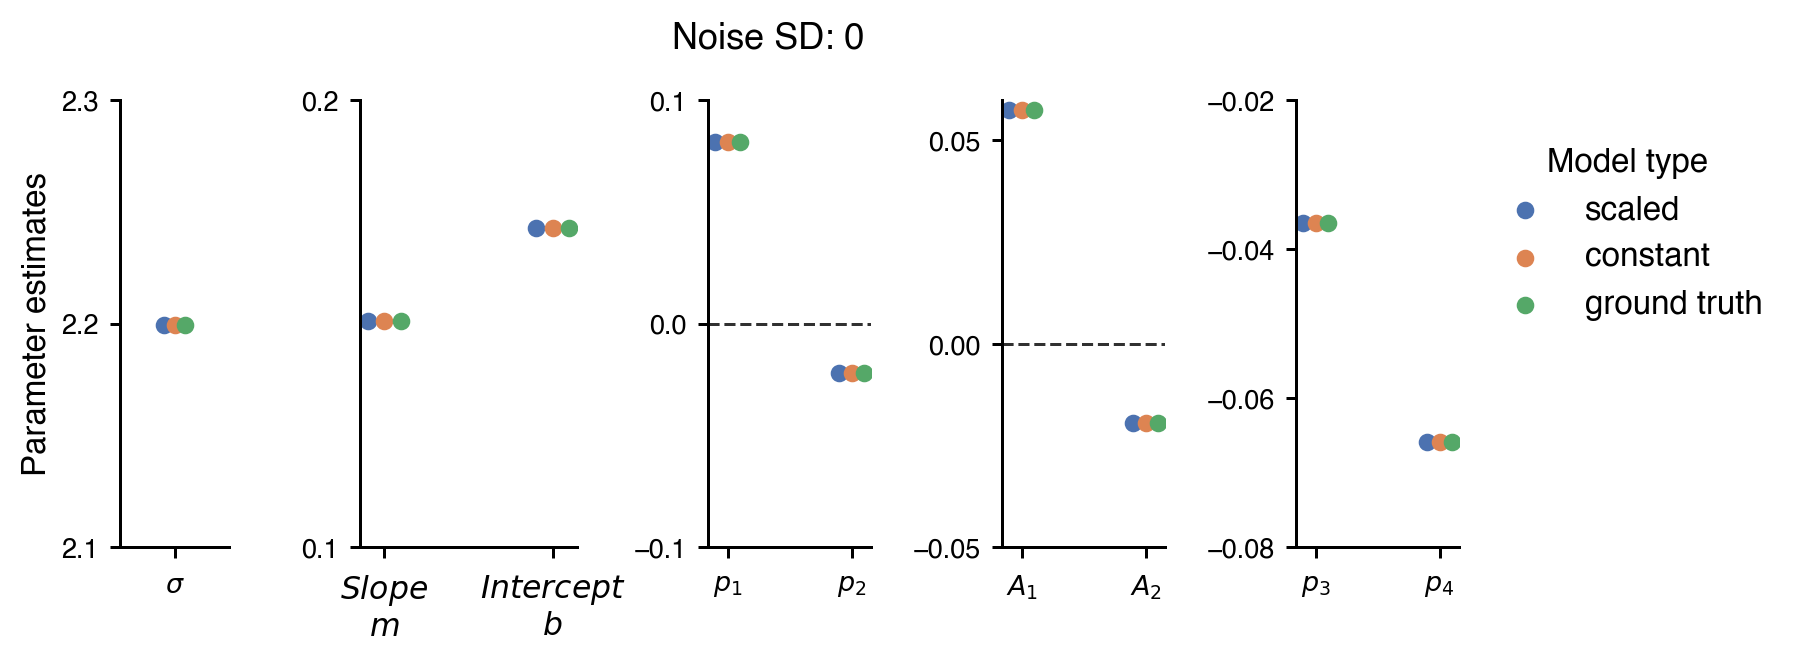

In [89]:
noise_lvl = str(0)
tmp = model_df.query('noise == @noise_lvl')
original_params['grating'] = 'ground truth'
original_params['noise'] = 'ground truth'
tmp = pd.concat([tmp, original_params], axis=0)

ylim_list = [(2.1, 2.3), (0.1, 0.2), (-0.1, 0.1),(-0.05,0.06), (-0.08, -0.03)]
yticks_list=  [[2.1, 2.2, 2.3], [0.1, 0.2], [-0.1, 0, 0.1], [-0.05,0,0.05], [-0.08,-0.06,-0.04,-0.02]]
params_list = [['sigma'], ['slope', 'intercept'], ['p_1', 'p_2'], ['A_1','A_2'], ['p_3', 'p_4']]

fig, axes = plt.subplots(1,5, figsize=(8,2.8), 
                         gridspec_kw={'width_ratios': [1,2,1.5,1.5,1.5]})
vis2D.plot_model_comparison_params(tmp, 
                             params_list = params_list, 
                             hue='grating',
                             suptitle='Noise SD: ' + noise_lvl,
                             ylim=ylim_list, yticks=yticks_list,
                             fig=fig, axes=axes,
                             save_path=None)


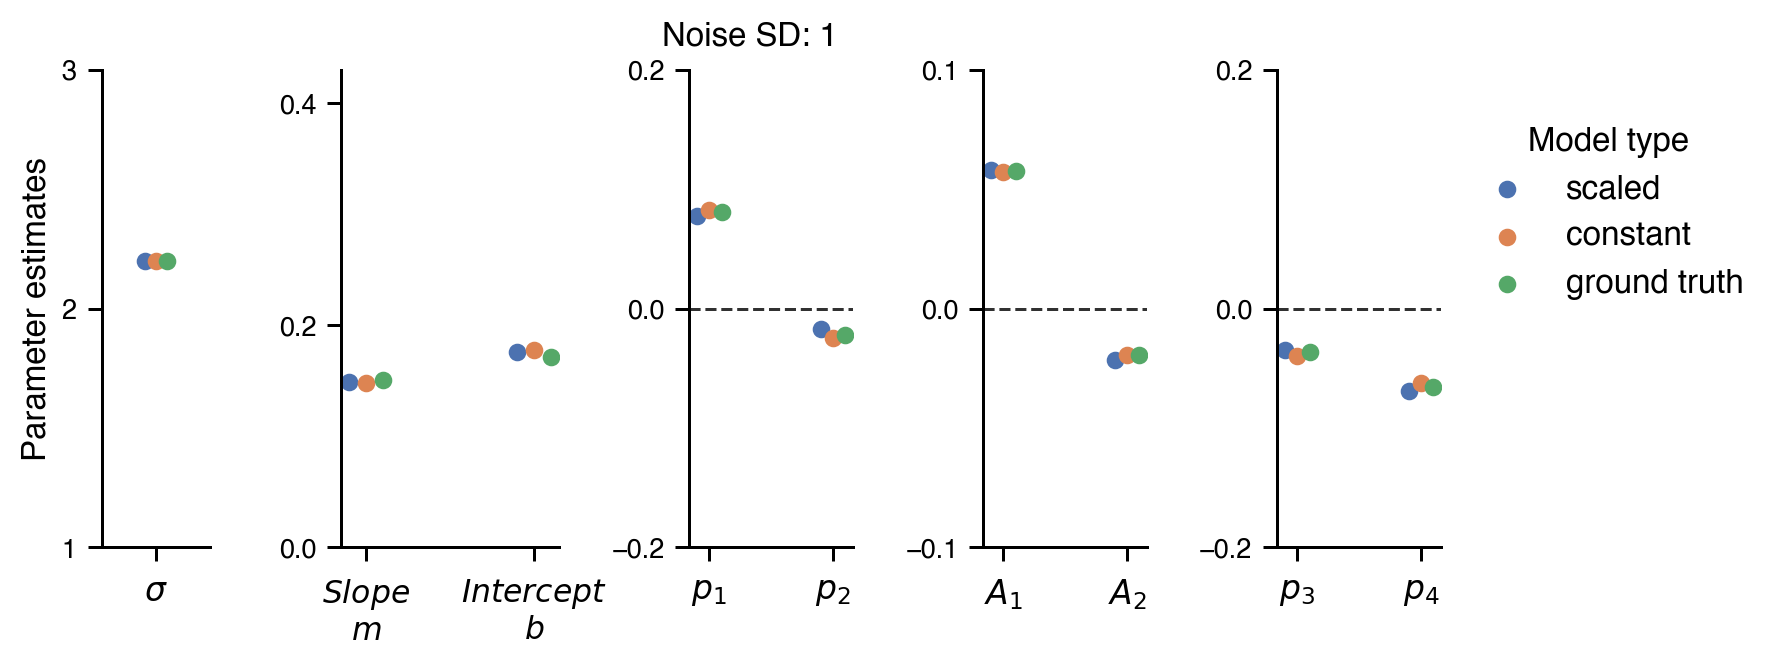

In [86]:
ylim_list = [(1, 3), (0, 0.43), (-0.2, 0.2),(-0.1,0.1), (-0.2, 0.2)]
yticks_list=  [[1,2,3], [0, 0.2, 0.4], [-0.2,0,0.2], [-0.1,0,0.1], [-0.2,0,0.2]]
params_list = [['sigma'], ['slope', 'intercept'], ['p_1', 'p_2'], ['A_1','A_2'], ['p_3', 'p_4']]

fig, axes = plt.subplots(1,5, figsize=(8,2.8), 
                         gridspec_kw={'width_ratios': [1,2,1.5,1.5,1.5]})
vis2D.plot_model_comparison_params(tmp, 
                             params_list = params_list, 
                             hue='grating',
                             suptitle='Noise SD: ' + noise_lvl,
                             ylim=ylim_list, yticks=yticks_list,
                             fig=fig, axes=axes,
                             save_path=None)
